In [1]:
# !pip install networkx
from collections import defaultdict, deque
import networkx as nx
import matplotlib.pyplot as plt
import json
import os
import time

In [2]:
def top_sort(tasks, graph):
    in_degree = {t: 0 for t in tasks}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([t for t in tasks if in_degree[t] == 0])
    top_order = []
    
    while queue:
        node = queue.popleft()
        top_order.append(node)
        
        for neighbor in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)
    
    return top_order

In [8]:
def mpcs(tasks, edges, delays):
    graph = defaultdict(list)
    finish_times = {t: delays[t] for t in tasks}
    
    for u, v in edges:
        graph[u].append(v)
    start_time = time.time()
    top_order = top_sort(tasks, graph)
    
    for i in range(1, len(top_order)):
        finish_times[top_order[i]] += finish_times[top_order[i-1]] + 1
    
    finish_time = max(finish_times.values())
    
    end_time = time.time()
    time_taken = end_time - start_time
    return finish_times, finish_time, top_order, time_taken

In [9]:
def draw_graph(tasks, edges, delays):
    G = nx.DiGraph()
    
    G.add_nodes_from(tasks)
    
    # Add edges with weights (delays)
    G.add_edges_from(edges)
    
    # Define positions for nodes using a layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=16, font_color='black', arrowstyle='-|>', arrowsize=20)
    
    # Draw the delays as separate text next to the nodes
    for node, (x, y) in pos.items():
        plt.text(x + 0.09, y - 0.075, s=f"Delay: {delays[node]}", bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center', fontsize=12, color='blue')
    
    # Show the plot
    plt.show()

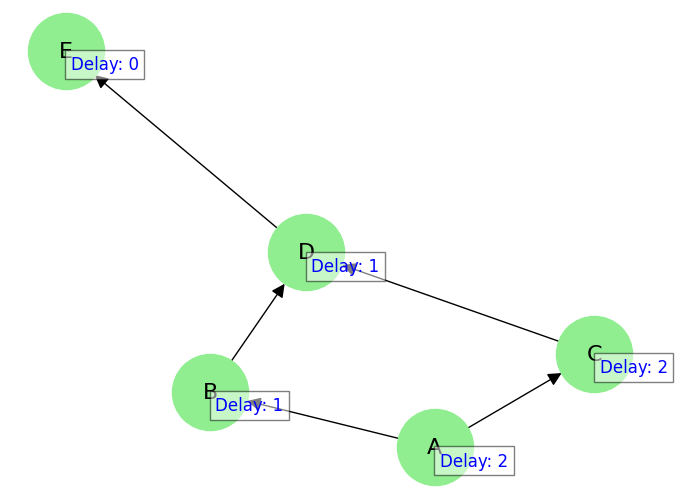

The order of the task completion: ['A', 'B', 'C', 'D', 'E']
Earliest completion times for each task: {'A': 2, 'B': 4, 'C': 7, 'D': 9, 'E': 10}
Minimum finish time: 10
Time taken to find a solution: 0.0


In [11]:
tasks = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
delays = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 0}
draw_graph(tasks, edges, delays)

dp, finish_time, order_of_tasks, time_taken = mpcs(tasks, edges, delays)

print("The order of the task completion:", order_of_tasks)
print("Earliest completion times for each task:", dp)
print("Minimum finish time:", finish_time)
print("Time taken to find a solution:", time_taken)

In [12]:
def save_results(file, data):
    with open(file, 'w') as file:
        json.dump(data, file, indent=4)
    print(f"Data saved to {file}")

The order of the task completion: ['A', 'B', 'D', 'E', 'C']
Earliest completion times for each task: {'A': 2, 'B': 5, 'C': 14, 'D': 8, 'E': 10}
Minimum finish time: 14
Time taken to find a solution: 0.0


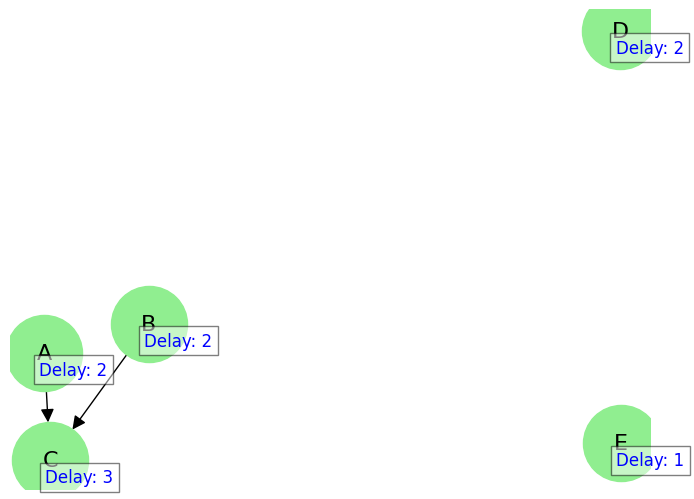

----------------------------------------------
The order of the task completion: ['A', 'D', 'B', 'C', 'E', 'F']
Earliest completion times for each task: {'A': 0, 'B': 8, 'C': 9, 'D': 3, 'E': 10, 'F': 14}
Minimum finish time: 14
Time taken to find a solution: 0.0


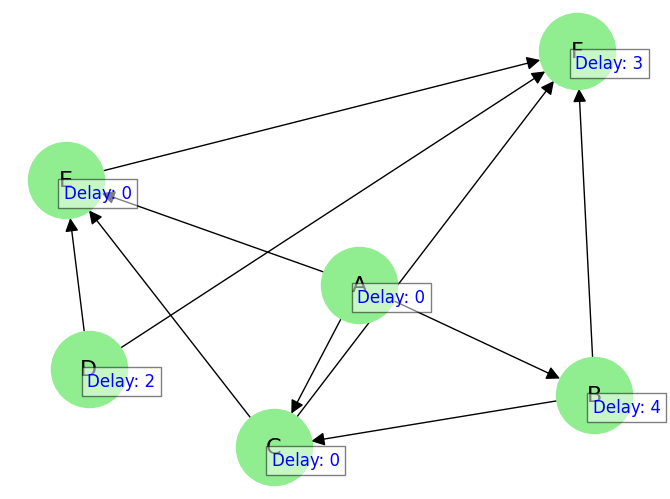

----------------------------------------------
The order of the task completion: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Earliest completion times for each task: {'A': 2, 'B': 5, 'C': 7, 'D': 11, 'E': 15, 'F': 19, 'G': 22}
Minimum finish time: 22
Time taken to find a solution: 0.0


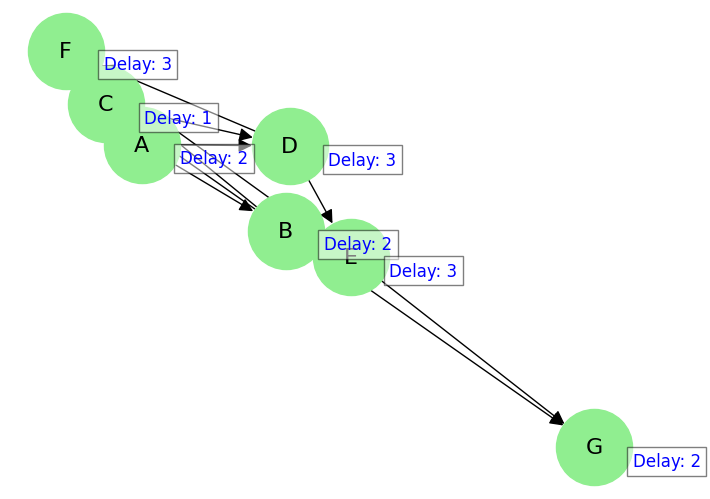

----------------------------------------------
The order of the task completion: ['A', 'B', 'C', 'D', 'H', 'E', 'F', 'G']
Earliest completion times for each task: {'A': 3, 'B': 8, 'C': 10, 'D': 12, 'E': 18, 'F': 24, 'G': 26, 'H': 14}
Minimum finish time: 26
Time taken to find a solution: 0.0


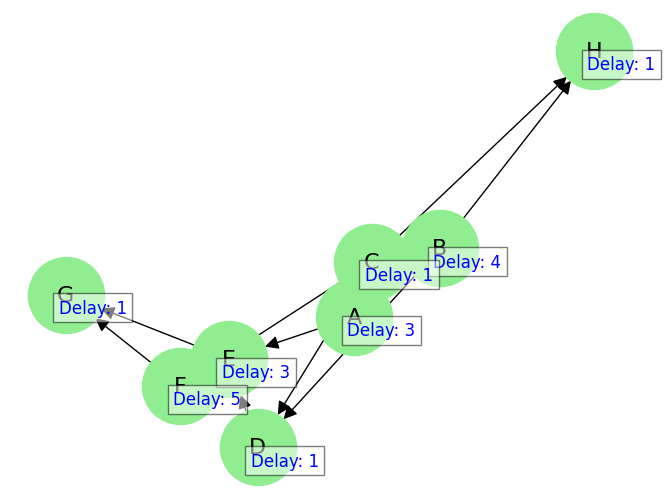

----------------------------------------------
The order of the task completion: ['A', 'B', 'C', 'G', 'D', 'E', 'F', 'H', 'I']
Earliest completion times for each task: {'A': 1, 'B': 5, 'C': 10, 'D': 18, 'E': 23, 'F': 24, 'G': 16, 'H': 26, 'I': 31}
Minimum finish time: 31
Time taken to find a solution: 0.0


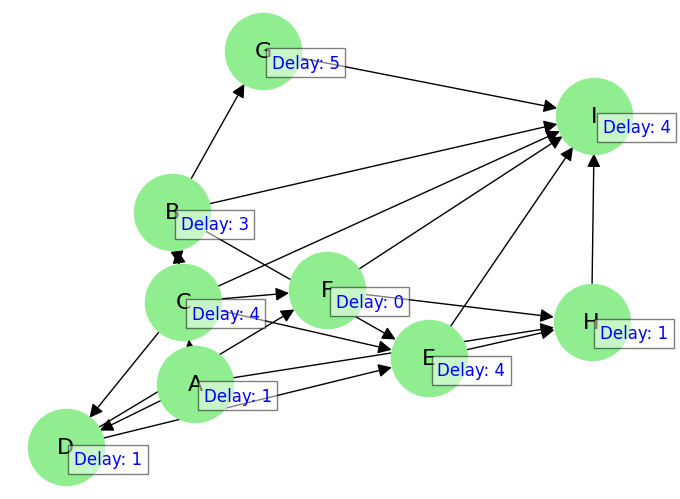

----------------------------------------------
Data saved to <_io.TextIOWrapper name='results/brute_force.json' mode='w' encoding='cp1252'>


In [18]:
path = 'test_files/'
files = os.listdir(path)
# Filter files that match the pattern 'test_file_*.py'
data_files = [f for f in files if f.startswith('test_file_') and f.endswith('.json')]
data_to_write = []
# Loop through each file and import the data
for file_name in data_files:
    file_path = os.path.join(path, file_name)
    with open(file_path, 'r') as f:
        loaded_data = json.load(f)
        tasks = loaded_data.get('tasks')
        edges = loaded_data.get('edges')
        delays = loaded_data.get('delays')

        finish_times, finish_time, order_of_tasks, time_taken = mpcs(tasks, edges, delays)
        print("The order of the task completion:", order_of_tasks)
        print("Earliest completion times for each task:", finish_times)
        print("Minimum finish time:", finish_time)
        print("Time taken to find a solution:", time_taken)
        draw_graph(tasks, edges, delays)
        print("----------------------------------------------")
        data = {
        'test_name' : file_name,
        'order_of_tasks': order_of_tasks,
        'finish_times': finish_times,
        'finish_time': finish_time,
        'time_taken': time_taken
        }
        data_to_write.append(data)

result_file = 'results/brute_force.json'
save_results(result_file, data_to_write)

### Za velike podatke 

In [14]:
# tasks = [f'T{i}' for i in range(1, 9990001)]

In [11]:
# import random

# edges = []
# for i in range(1, 9990001):
#     # Define the range of nodes that can be connected to
#     start = i + 1
#     end = min(i + 5, 9990001)  # Ensure we do not go out of bounds
#     # Compute the maximum number of targets we can sample
#     max_targets = end - start
#     if max_targets > 0:
#         num_connections = random.randint(1, min(5, max_targets))  # Random number of connections within the bounds
#         targets = random.sample(range(start, end), num_connections)
#         for target in targets:
#             edges.append((f'T{i}', f'T{target}'))

In [12]:
# import random

# delays = {f'T{i}': random.randint(1, 10) for i in range(1, 9990001)}

In [13]:
# dp, finish_time = mpcs(tasks, edges, delays)

# print("Earliest completion times for each task:", dp)
# print("Minimum finish time:", finish_time)